# Вычислительное дз 1 по случайным процессам

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Раcчет вероятностей

## № 1 Вычислите при помощи любого статистического пакета следующие значения:



<b> a) Вероятность того, что биномиальная случайная величина B(n=100, p = 0.3) примет значение, не превыщающее 25 </b>

In [ ]:
# Число успехов в конкретном случае
number_of_successes = np.random.binomial(n=100, p=0.3)
number_of_successes

31

In [ ]:
# Моделируем эксперимент 1000000 раз и считаем, сколько результатов получилось менее 25
print(f"Ответ: {sum(np.random.binomial(n=100, p=0.3, size=1000000) <= 25)/1000000}")

Ответ: 0.163498


In [ ]:
# Эту же вероятность можно посчитать из куммулятивной функции распределения
from scipy.stats import binom

binom.cdf(25, n=100, p=0.3, loc=0)

0.16313010446635084

<b> b) Значение функции плотности нормальной случайной величины N(10, 25) в точке x = 7.5 </b>

In [ ]:
from scipy.stats import norm, poisson
alpha = 10
sigma = np.sqrt(25)
x = 7.5
result = norm.pdf(x,loc=alpha, scale=sigma)
print(f"Ответ: {result}")

Ответ: 0.0704130653528599


<b> c) Вероятность того, что пуассоновская случайная величина $$Pois(λ = 100)$$ примет значение 115 </b>

In [ ]:
l=100
print(f"Ответ: {poisson.pmf(115, l, loc=0)}")

Ответ: 0.01271780108889097


<b>d) Среднее значение 10000 независимых случайных величин, имеющих экспоненциальное распределение с $$ λ = 0.4 $$ </b>

In [ ]:
n=10000
random_variables = np.random.exponential(scale=1/0.4, size=n)
mean = np.mean(random_variables)
print(f"Ответ: {mean}")

Ответ: 2.4914667428855424


<b> e) Среднее значение 10000 независимых случайных геометрических величин с p=0.1 </b>

In [ ]:
n=10000
random_variables = np.random.geometric(p=0.1, size=n)
mean = np.mean(random_variables)
print(f"Ответ: {mean}")

Ответ: 9.8801


# Генераторы случайных чисел

# № 2

In [ ]:
# Генерируем случайные величины и проводим преобразования
n=5000
uniform_variables = np.random.uniform(size=n)
transformed_variables = - np.log(1-uniform_variables)/2


In [ ]:
# Генерируем случайные величины экспоненциальной случайной величины
exponential_variables = np.random.exponential(scale=1/2, size=n)

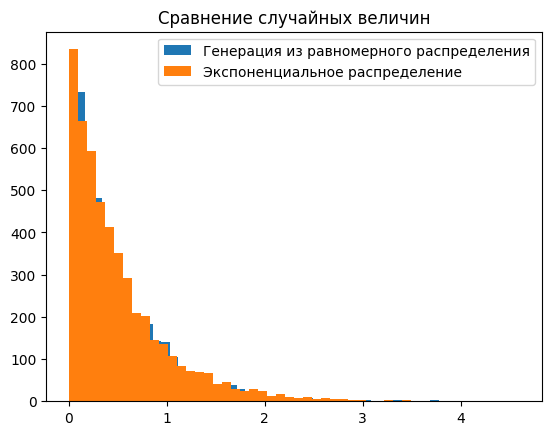

In [ ]:
# Визуализация
plt.hist(transformed_variables, bins=50)
plt.hist(exponential_variables, bins=50)


plt.title("Сравнение случайных величин")
plt.legend(["Генерация из равномерного распределения", "Экспоненциальное распределение"])
plt.show()

# № 3

In [ ]:
# Генерируем случайные величины
n = 5000
uniform_variables = np.random.uniform(low=0, high=2*np.pi, size=n)
exponential_variables = np.random.exponential(scale=1, size=n)

In [ ]:
# Делаем преобразования над случайными величинами
z1 = np.sqrt(2 * exponential_variables) * np.sin(uniform_variables)
z2 = np.sqrt(2 * exponential_variables) * np.cos(uniform_variables)

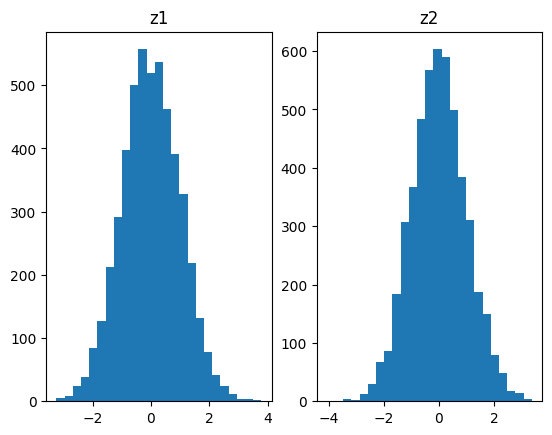

In [ ]:
# Визуализация
fig, ax = plt.subplots(ncols=2)

ax[0].hist(z1, bins=25)
ax[0].set_title("z1")
ax[1].hist(z2, bins=25)
ax[1].set_title("z2")

plt.show()

In [ ]:
from scipy.stats import moment

third_moment_z1 = moment(z1, order = 3)
fourth_moment_z1 =  moment(z1, order = 4)


third_moment_z2 = moment(z2, order = 3)
fourth_moment_z2 =  moment(z2, order = 4)

print(f"Третий {third_moment_z1} и четвертый {fourth_moment_z1} моменты для z1")
print(f"Третий {third_moment_z2} и четвертый {fourth_moment_z2} моменты для z2")

Третий 0.03777089856805147 и четвертый 2.83879620793774 моменты для z1
Третий 0.0584507728834806 и четвертый 2.977629671343591 моменты для z2


# № 4

In [ ]:
n=1000000

In [ ]:
random_variables = np.random.normal(loc=0, scale = np.sqrt(1/n), size = n)

In [ ]:
# Накопленные суммы W_t
w = np.cumsum(random_variables)

#Генерируем интервал i/n [0,1]
t = np.arange(1, n+1)/n

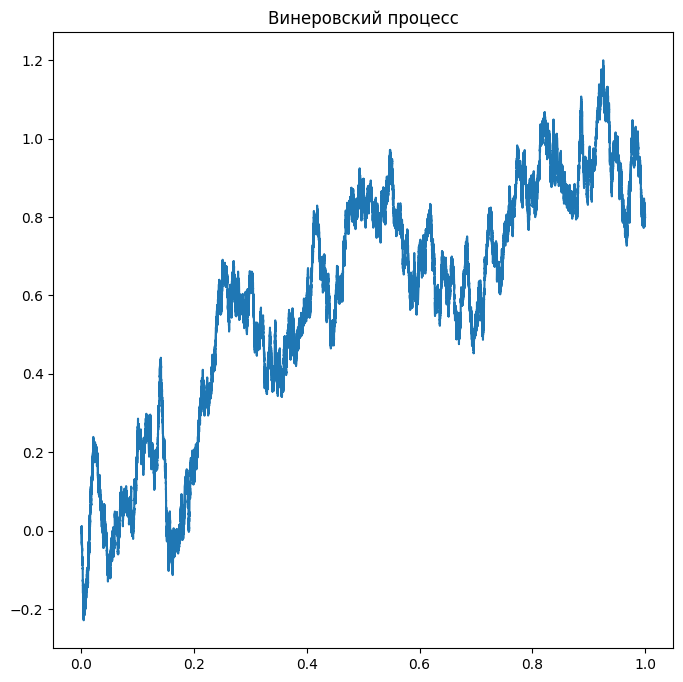

In [ ]:
figure, ax = plt.subplots(figsize=(8, 8))
ax.plot(t, w)
ax.set_title("Винеровский процесс")
plt.show()

# Приближенное решение задач методом Монте-Карло

# № 5

<b>
X, Y брошены независимо на отрезок [0,1]. Найдите приближенное значение вероятности того, что X/Y ближе к четному числу чем к нечетному </b>

In [ ]:
N = 100000 # число итераций в Монте-карло моделировании

# независимо сгенерируем из равномерного распределения [0, 1]
x = np.random.uniform(size=N)
y = np.random.uniform(size=N)


In [ ]:
# посчитаем частное для каждой итерации
statistic = [(xi/yi) for xi,yi in zip(x, y)]
statistic[:5]

[0.9339025635410877,
 5.763110119647615,
 7.497666197373938,
 6.764500239917157,
 7.075523497260025]

In [ ]:
# 1 если ближе к четному, 0 если к нечетному
is_close_to_even = [1 if round(stat)%2==0 else 0 for stat in statistic]
is_close_to_even[:5]

[0, 1, 0, 0, 0]

In [ ]:
prob = np.mean(is_close_to_even)
print(f"Ответ: Вероятность равна {round(prob, 2)}")

Ответ: Вероятность равна 0.47


# № 6
<b> Палку разломали на n кусков, из кусков выбрали 3 наугад. Найдите приближенное значение вероятности того, что из кусков можно сложить треугольник при n=5,15,30 </b>

In [ ]:
from itertools import combinations

def check_trig(lengths) -> bool:
  # функция для проверки возможности получения треугольника

  # берем сочетания без повторений для длин
  for a, b, c in combinations(lengths, 3):
    if (a <= b + c) and (b <= a + c) and (c <= b + a):
      return 1
    else:
      return 0

In [ ]:
N = 100000 # число итераций в Монте-карло моделировании

# пусть длина палки будет 100, тогда куски можно моделировать как точки равномерного распределения [0, 100]

# Напишем функцию для расчета вероятности при заданном n

def count_probability(n: int) -> float:

  is_trig = []
  # Проводим расчеты по каждой итерации
  for _ in range(N):
    # генерируем точки на отрезке
    dots = np.random.uniform(low=0, high=100, size=n)



    #считаем длины отрезков
    lengths = [(100 - dot) for dot in dots]

    # мы сможем сделать треугольник из кусков, если будет выполняться неравенство треугольника
    is_trig.append(check_trig(lengths))

  # Возвращаем оценку вероятности
  return np.mean(is_trig)



In [ ]:
# для n = 5
print(count_probability(n=5))

0.49872


In [ ]:
# для n = 15
print(count_probability(n=15))

0.50081


In [ ]:
# для n = 30
print(count_probability(n=30))

0.49922
